Exercises
Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

What is your baseline prediction? What is your baseline accuracy? 
remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). 
When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [1]:

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import acquire
import prepare
# grab Decision Tree Classifier and some helping friends from sklearn.tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
# get classification report for model assessment
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

In [3]:
titanic_db=pd.read_csv('titanic_db')

In [4]:
titanic_db.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [5]:
titanic_db.survived.mode()

0    0
Name: survived, dtype: int64

this is my baseline accuracy. my baseline prediction is "not survived"

In [6]:
(1-titanic_db.survived.mean()) *100

61.61616161616161

2) Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [7]:
titanic_db=prepare.prep_titanic(titanic_db)


In [8]:
titanic_db

,Unnamed: 0,passenger_id,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,0,3,22.000000,1,0,7.2500,0,1,0,1
1,1,1,1,1,38.000000,1,0,71.2833,0,0,0,0
2,2,2,1,3,26.000000,0,0,7.9250,1,0,0,1
3,3,3,1,1,35.000000,1,0,53.1000,0,0,0,1
4,4,4,0,3,35.000000,0,0,8.0500,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,0,2,27.000000,0,0,13.0000,1,1,0,1
887,887,887,1,1,19.000000,0,0,30.0000,1,0,0,1
888,888,888,0,3,29.699118,1,2,23.4500,0,0,0,1
889,889,889,1,1,26.000000,0,0,30.0000,1,1,0,0


In [9]:
train,validate,test=prepare.my_train_test_split(titanic_db,'survived')

In [10]:
train.head()

,Unnamed: 0,passenger_id,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,455,455,1,3,29.000000,0,0,7.8958,1,1,0,0
380,380,380,1,1,42.000000,0,0,227.5250,1,0,0,0
492,492,492,0,1,55.000000,0,0,30.5000,1,1,0,1
55,55,55,1,1,29.699118,0,0,35.5000,1,1,0,1
243,243,243,0,3,22.000000,0,0,7.1250,1,1,0,1


In [11]:
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [12]:
X_train.head()

,Unnamed: 0,passenger_id,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,455,455,3,29.000000,0,0,7.8958,1,1,0,0
380,380,380,1,42.000000,0,0,227.5250,1,0,0,0
492,492,492,1,55.000000,0,0,30.5000,1,1,0,1
55,55,55,1,29.699118,0,0,35.5000,1,1,0,1
243,243,243,3,22.000000,0,0,7.1250,1,1,0,1


In [13]:
y_train.head()

455    1
380    1
492    0
55     1
243    0
Name: survived, dtype: int64

In [14]:
clf=DecisionTreeClassifier(max_depth=3, random_state=123)

In [15]:
clf

DecisionTreeClassifier(max_depth=3, random_state=123)

In [16]:
clf= clf.fit(X_train, y_train)

[Text(0.5, 0.875, 'sex_male <= 0.5\ngini = 0.473\nsamples = 534\nvalue = [329, 205]\nclass = perished'),
 Text(0.25, 0.625, 'pclass <= 2.5\ngini = 0.372\nsamples = 186\nvalue = [46, 140]\nclass = survived'),
 Text(0.125, 0.375, 'age <= 3.0\ngini = 0.078\nsamples = 98\nvalue = [4, 94]\nclass = survived'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = perished'),
 Text(0.1875, 0.125, 'gini = 0.06\nsamples = 97\nvalue = [3, 94]\nclass = survived'),
 Text(0.375, 0.375, 'fare <= 24.808\ngini = 0.499\nsamples = 88\nvalue = [42, 46]\nclass = survived'),
 Text(0.3125, 0.125, 'gini = 0.48\nsamples = 75\nvalue = [30, 45]\nclass = survived'),
 Text(0.4375, 0.125, 'gini = 0.142\nsamples = 13\nvalue = [12, 1]\nclass = perished'),
 Text(0.75, 0.625, 'fare <= 18.275\ngini = 0.304\nsamples = 348\nvalue = [283, 65]\nclass = perished'),
 Text(0.625, 0.375, 'age <= 13.5\ngini = 0.193\nsamples = 222\nvalue = [198, 24]\nclass = perished'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples 

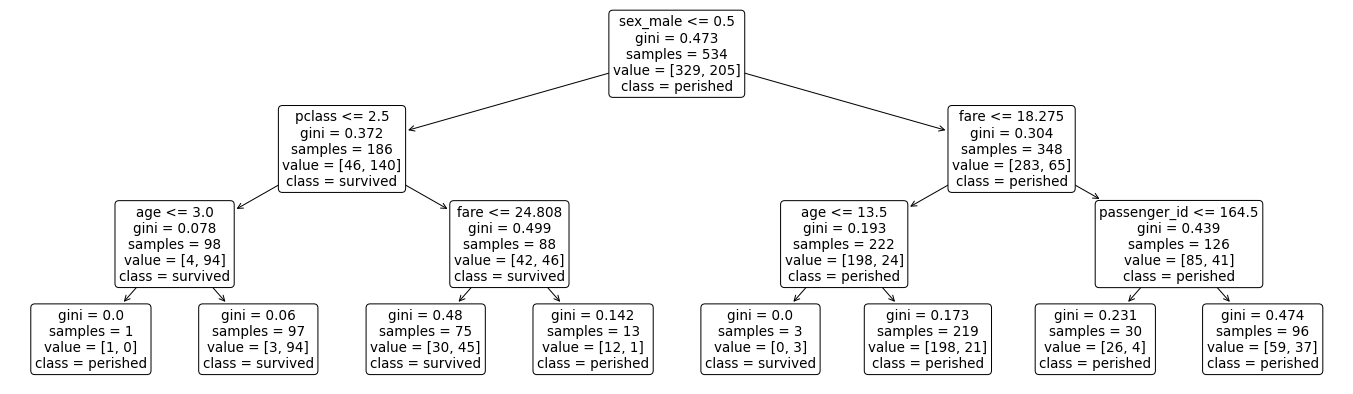

In [17]:
plt.figure(figsize=(24, 7))
plot_tree(clf, feature_names=X_train.columns.to_list(), class_names=['perished', 'survived'], rounded=True)


In [18]:
y_pred= clf.predict(X_train)


In [19]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [20]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]


array([[0.90410959, 0.09589041],
       [0.03092784, 0.96907216],
       [0.61458333, 0.38541667],
       [0.86666667, 0.13333333],
       [0.90410959, 0.09589041]])

In [21]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))


Accuracy of Decision Tree classifier on training set: 0.82


Exercises
Continue working in your model file with titanic data to do the following:

1)Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) 
setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [22]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt

import seaborn as sns


from pydataset import data

In [23]:
titanic_db.head()

,Unnamed: 0,passenger_id,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,1,1,38.0,1,0,71.2833,0,0,0,0
2,2,2,1,3,26.0,0,0,7.9250,1,0,0,1
3,3,3,1,1,35.0,1,0,53.1000,0,0,0,1
4,4,4,0,3,35.0,0,0,8.0500,1,1,0,1


In [24]:
titanic_db=titanic_db.drop(['Unnamed: 0','passenger_id'], axis=1)

In [25]:
titanic_db

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.000000,1,0,7.2500,0,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,0,1
4,0,3,35.000000,0,0,8.0500,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,1,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,0,1
889,1,1,26.000000,0,0,30.0000,1,1,0,0


In [26]:
train, validate, test=prepare.my_train_test_split(titanic_db,'survived')

In [27]:
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [28]:
rf= RandomForestClassifier(max_depth=10, min_samples_leaf=1, random_state=123)

In [29]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [30]:
#evaluate the weight or importance of each feature

print(rf.feature_importances_)




[0.09421609 0.20477997 0.04890324 0.03149871 0.2567332  0.02127994
 0.29633672 0.01698538 0.02926674]


In [31]:
#make predictions


y_pred = rf.predict(X_train)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [32]:
y_pred_proba=rf.predict_proba(X_train)

y_pred_proba

array([[0.58424959, 0.41575041],
       [0.00151515, 0.99848485],
       [0.78565533, 0.21434467],
       ...,
       [0.87336424, 0.12663576],
       [0.82141911, 0.17858089],
       [0.01151515, 0.98848485]])

2) Evaluate your results using the model score, confusion matrix, and classification report.



In [33]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))


Accuracy of random forest classifier on training set: 0.97


In [34]:
cm=(confusion_matrix(y_train,y_pred))

In [35]:
TN,FP, FN, TP=confusion_matrix(y_train, y_pred).ravel()

In [36]:
TN,FP, FN, TP

(329, 0, 17, 188)

In [37]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)

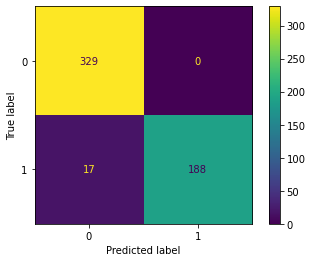

In [38]:
disp.plot()
plt.show()

In [39]:
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       329
           1       1.00      0.92      0.96       205

    accuracy                           0.97       534
   macro avg       0.98      0.96      0.97       534
weighted avg       0.97      0.97      0.97       534



3) Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



4) Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [40]:
rf= RandomForestClassifier(max_depth=6, min_samples_leaf=4, random_state=123)

In [41]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=4, random_state=123)

In [42]:
print(rf.feature_importances_)

[0.12693241 0.10641464 0.04525011 0.02489143 0.17852884 0.02227081
 0.4494565  0.0201878  0.02606746]


In [43]:
y_pred=rf.predict(X_train)


In [44]:
y_pred_proba=rf.predict_proba(X_train)
y_pred_proba

array([[0.80522316, 0.19477684],
       [0.03054369, 0.96945631],
       [0.73211807, 0.26788193],
       ...,
       [0.87810826, 0.12189174],
       [0.90278091, 0.09721909],
       [0.04153346, 0.95846654]])

In [45]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.88


5) What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

As i reduced the depth the accuracy went down to commiserate with the drop

# KNN EXERCISES

# Continue working in your model file with the titanic dataset.

# 1) Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

titanic_db.head()


,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,1


In [47]:
knn=KNeighborsClassifier(n_neighbors=5)

In [48]:
# fit the model to the data

knn.fit(X_train,y_train)


KNeighborsClassifier()

In [49]:
#make predictions
y_pred=knn.predict(X_train)
y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [50]:
#estimate probability 

y_pred_proba=knn.predict_proba(X_train)
y_pred_proba




array([[0.8, 0.2],
       [0.2, 0.8],
       [0.8, 0.2],
       ...,
       [0.6, 0.4],
       [0.6, 0.4],
       [0.2, 0.8]])

In [51]:
print('accuracy of KNN classifier on training set: {:.2f}'
    .format (knn.score(X_train,y_train)))

accuracy of KNN classifier on training set: 0.79


# 2) Evaluate your results using the model score, confusion matrix, and classification report.



In [52]:
knn.score(X_train,y_train)

0.7940074906367042

In [53]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       329
           1       0.74      0.72      0.73       205

    accuracy                           0.79       534
   macro avg       0.78      0.78      0.78       534
weighted avg       0.79      0.79      0.79       534



In [54]:
print(confusion_matrix(y_train,y_pred))

[[276  53]
 [ 57 148]]


In [55]:
pd.crosstab(y_train, y_pred)

col_0,0,1
survived,,
0,276,53
1,57,148


# 3) Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [56]:
confusion_matrix(y_train, y_pred).ravel()


array([276,  53,  57, 148])

In [57]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
all = tn + fp + fn + tp


In [58]:
tn, fp, fn, tp, all

(276, 53, 57, 148, 534)

In [59]:
accuracy = (tp + tn)/all
print(f"Accuracy: {accuracy}")

true_positive_rate = tp/(tp+fn)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = fp/(fp+tn)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = tn/(tn+fp)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = fn/(fn+tp)
print(f"False Negative Rate: {false_negative_rate}")

precision = tp/(tp+fp)
print(f"Precision: {precision}")

recall = tp/(tp+fn)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = tp + fn
print(f"Support (0): {support_pos}")

support_neg = fp + tn
print(f"Support (1): {support_neg}")

Accuracy: 0.7940074906367042
True Positive Rate: 0.7219512195121951
False Positive Rate: 0.16109422492401215
True Negative Rate: 0.8389057750759878
False Negative Rate: 0.2780487804878049
Precision: 0.736318407960199
Recall: 0.7219512195121951
F1 Score: 0.7290640394088669
Support (0): 205
Support (1): 329


# 4) Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [60]:
knn=KNeighborsClassifier(n_neighbors=10)

In [61]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [62]:
y_pred=knn.predict(X_train)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [63]:
y_pred_proba=knn.predict_proba(X_train)
y_pred_proba

array([[0.7, 0.3],
       [0.3, 0.7],
       [0.8, 0.2],
       ...,
       [0.7, 0.3],
       [0.7, 0.3],
       [0.3, 0.7]])

In [64]:
knn.score(X_train, y_train)

0.7471910112359551

In [65]:
confusion_matrix(y_train, y_pred).ravel()

array([298,  31, 104, 101])

In [66]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
all = tn + fp + fn + tp

In [67]:
tn, fp, fn, tp, all

(298, 31, 104, 101, 534)

In [68]:
accuracy = (tp + tn)/all
print(f"Accuracy: {accuracy}")

true_positive_rate = tp/(tp+fn)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = fp/(fp+tn)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = tn/(tn+fp)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = fn/(fn+tp)
print(f"False Negative Rate: {false_negative_rate}")

precision = tp/(tp+fp)
print(f"Precision: {precision}")

recall = tp/(tp+fn)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = tp + fn
print(f"Support (0): {support_pos}")

support_neg = fp + tn
print(f"Support (1): {support_neg}")

Accuracy: 0.7471910112359551
True Positive Rate: 0.4926829268292683
False Positive Rate: 0.09422492401215805
True Negative Rate: 0.9057750759878419
False Negative Rate: 0.5073170731707317
Precision: 0.7651515151515151
Recall: 0.4926829268292683
F1 Score: 0.5994065281899109
Support (0): 205
Support (1): 329


# Run through steps 2-4 setting k to 20

In [69]:

models_acc = []

for x in range(1,21):

    #make it
    knn = KNeighborsClassifier(n_neighbors=x)

    #fit it
    knn = knn.fit(X_train, y_train)

    #predict it
    y_pred = knn.predict(X_train)
    
    #score it
    acc = knn.score(X_train, y_train)
    
    models_acc.append([x, acc])

In [70]:
pd.DataFrame(models_acc, columns =['neighbors','accuracy'])

,neighbors,accuracy
0,1,0.994382
1,2,0.837079
2,3,0.844569
3,4,0.803371
4,5,0.794007
5,6,0.775281
6,7,0.771536
7,8,0.762172
8,9,0.762172
9,10,0.747191


# What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

Smaller numbers for k are able to capture details within the training set, but carry a risk for overfitting

# Which model performs best on our out-of-sample data from validate?

In [71]:
models_acc = []

for x in range(1,31):

    #make it
    knn = KNeighborsClassifier(n_neighbors=x)

    #fit it
    knn = knn.fit(X_train, y_train)

#     predict it
#     y_pred = knn.predict(X_train)
#     y_pred_val = knn.predict(X_validate)
    
    #score it
    acc = knn.score(X_train, y_train)
    acc_val = knn.score(X_validate, y_validate)
    
    models_acc.append([x, acc, acc_val])

In [72]:
df_models = pd.DataFrame(models_acc, columns=['neighbors', 'train_accuracy',
                                  'validate_accuracy'])
df_models

,neighbors,train_accuracy,validate_accuracy
0,1,0.994382,0.702247
1,2,0.837079,0.662921
2,3,0.844569,0.724719
3,4,0.803371,0.707865
4,5,0.794007,0.696629
5,6,0.775281,0.713483
6,7,0.771536,0.696629
7,8,0.762172,0.707865
8,9,0.762172,0.691011
9,10,0.747191,0.719101


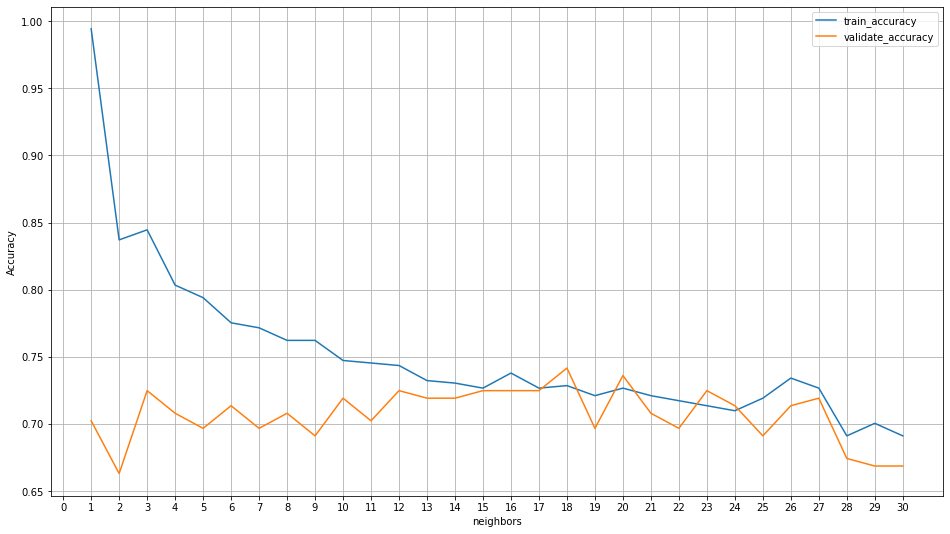

In [73]:
df_models.set_index('neighbors').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,31,1))
plt.grid()

# Exercises
# In these exercises, we'll continue working with the titanic dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

# For all of the models you create, choose a threshold that optimizes for accuracy.

# Do your work for these exercises in either a notebook or a python script named model within your classification-exercises repository. Add, commit, and push your work.

# 1) Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline?

In [74]:
titanic_db.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,1


In [104]:
baseline=1-titanic_db.survived.mean()
baseline

0.6161616161616161

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
titanic_db=acquire.get_titanic_data()

titanic_db.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [116]:
model1_db=titanic_db[['fare','pclass','age','survived']]

In [117]:
model1_db

,fare,pclass,age,survived
0,7.2500,3,22.000000,0
1,71.2833,1,38.000000,1
2,7.9250,3,26.000000,1
3,53.1000,1,35.000000,1
4,8.0500,3,35.000000,0
...,...,...,...,...
886,13.0000,2,27.000000,0
887,30.0000,1,19.000000,1
888,23.4500,3,29.699118,0
889,30.0000,1,26.000000,1


In [118]:
mean_age= model1_db.age.mean()
model1_db= model1_db.fillna(mean_age)
   
    
model1_db


,fare,pclass,age,survived
0,7.2500,3,22.000000,0
1,71.2833,1,38.000000,1
2,7.9250,3,26.000000,1
3,53.1000,1,35.000000,1
4,8.0500,3,35.000000,0
...,...,...,...,...
886,13.0000,2,27.000000,0
887,30.0000,1,19.000000,1
888,23.4500,3,29.699118,0
889,30.0000,1,26.000000,1


In [119]:
train, validate, test =prepare.my_train_test_split(model1_db, 'survived')

In [120]:
train.shape


(534, 4)

In [121]:
validate.shape

(178, 4)

In [95]:
test.shape

(179, 11)

In [122]:
X_train = train.drop(columns='survived')
y_train = train.survived
X_validate = validate.drop(columns='survived')
y_validate = validate.survived
X_test = test.drop(columns='survived')
y_test = test.survived

In [123]:
X_train

,fare,pclass,age
455,7.8958,3,29.000000
380,227.5250,1,42.000000
492,30.5000,1,55.000000
55,35.5000,1,29.699118
243,7.1250,3,22.000000
...,...,...,...
695,13.5000,2,52.000000
128,22.3583,3,29.699118
636,7.9250,3,32.000000
222,8.0500,3,51.000000


In [124]:
logit= LogisticRegression()


In [125]:
logit.fit(X_train, y_train)

LogisticRegression()

In [126]:
y_pred= logit.predict(X_train)

In [127]:
y_pred[:5]

array([0, 1, 0, 1, 0])

In [128]:
y_pred_proba = logit.predict_proba(X_train)
y_pred_proba = pd.DataFrame(y_pred_proba,
columns = ['not_survive', 'survived'])

In [129]:
y_pred_proba.head()

,not_survive,survived
0,0.765817,0.234183
1,0.314784,0.685216
2,0.512767,0.487233
3,0.330405,0.669595
4,0.727139,0.272861


In [130]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.87      0.79       329
           1       0.68      0.44      0.53       205

    accuracy                           0.71       534
   macro avg       0.70      0.66      0.66       534
weighted avg       0.70      0.71      0.69       534



In [108]:
baseline

0.6161616161616161

# my model was more accurate than my baseline

In [109]:
logit.coef_

array([[ 9.89192969e-04, -3.06801143e-01,  6.29287678e-04,
        -2.31163786e-01, -2.45082992e-01,  1.03734408e-02,
        -2.48396386e-01, -2.55229311e+00,  4.41973657e-01,
         1.00823261e-01]])

# 2)Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

In [134]:
titanic_db=acquire.get_titanic_data()

In [135]:
titanic_db

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,None,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,None,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [136]:
titanic_db=prepare.prep_titanic(titanic_db)

In [137]:
titanic_db

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,22.000000,1,0,7.2500,0,1,0,1
1,1,1,1,38.000000,1,0,71.2833,0,0,0,0
2,2,1,3,26.000000,0,0,7.9250,1,0,0,1
3,3,1,1,35.000000,1,0,53.1000,0,0,0,1
4,4,0,3,35.000000,0,0,8.0500,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,27.000000,0,0,13.0000,1,1,0,1
887,887,1,1,19.000000,0,0,30.0000,1,0,0,1
888,888,0,3,29.699118,1,2,23.4500,0,0,0,1
889,889,1,1,26.000000,0,0,30.0000,1,1,0,0


In [138]:
model2_titanic=titanic_db[['fare','pclass','age','survived','sex_male']]

In [139]:
model2_titanic


,fare,pclass,age,survived,sex_male
0,7.2500,3,22.000000,0,1
1,71.2833,1,38.000000,1,0
2,7.9250,3,26.000000,1,0
3,53.1000,1,35.000000,1,0
4,8.0500,3,35.000000,0,1
...,...,...,...,...,...
886,13.0000,2,27.000000,0,1
887,30.0000,1,19.000000,1,0
888,23.4500,3,29.699118,0,0
889,30.0000,1,26.000000,1,1


In [140]:
logit=LogisticRegression()

In [141]:
train, validate, test= prepare.my_train_test_split(model2_titanic,'survived')

In [142]:
X_train = train.drop(columns='survived')
y_train = train.survived
X_validate = validate.drop(columns='survived')
y_validate = validate.survived
X_test = test.drop(columns='survived')
y_test = test.survived

In [144]:
logit.fit(X_train,y_train)

LogisticRegression()

In [145]:
y_pred=logit.predict(X_train)

In [146]:
y_pred[:5]

array([0, 1, 0, 0, 0])

In [147]:
logit.predict_proba(X_train)[:10][:,1] > 0.5

array([False,  True, False, False, False, False,  True, False, False,
        True])

In [148]:
y_pred_proba = logit.predict_proba(X_train)
y_pred_proba = pd.DataFrame(y_pred_proba,
columns = ['not_survive', 'survived'])

In [149]:
y_pred_proba.head()

,not_survive,survived
0,0.907568,0.092432
1,0.117624,0.882376
2,0.676453,0.323547
3,0.508737,0.491263
4,0.889694,0.110306


In [150]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       329
           1       0.76      0.72      0.74       205

    accuracy                           0.81       534
   macro avg       0.80      0.79      0.79       534
weighted avg       0.80      0.81      0.80       534



# 3)Try out other combinations of features and models

In [152]:
model3_titanic=titanic_db[['fare','pclass','age','survived','sex_male','sibsp']]

In [153]:
model3_titanic

,fare,pclass,age,survived,sex_male,sibsp
0,7.2500,3,22.000000,0,1,1
1,71.2833,1,38.000000,1,0,1
2,7.9250,3,26.000000,1,0,0
3,53.1000,1,35.000000,1,0,1
4,8.0500,3,35.000000,0,1,0
...,...,...,...,...,...,...
886,13.0000,2,27.000000,0,1,0
887,30.0000,1,19.000000,1,0,0
888,23.4500,3,29.699118,0,0,1
889,30.0000,1,26.000000,1,1,0


In [154]:
train, validate, test=prepare.my_train_test_split(model3_titanic,'survived')

In [156]:
X_train = train.drop(columns='survived')
y_train = train.survived
X_validate = validate.drop(columns='survived')
y_validate = validate.survived
X_test = test.drop(columns='survived')
y_test = test.survived

In [157]:
logit.fit(X_train,y_train)

LogisticRegression()

In [158]:
y_pred=logit.predict(X_train)

In [159]:
y_pred_proba = logit.predict_proba(X_train)
y_pred_proba = pd.DataFrame(y_pred_proba,
columns = ['not_survive', 'survived'])

In [160]:
y_pred_proba.head()

,not_survive,survived
0,0.895227,0.104773
1,0.080287,0.919713
2,0.696578,0.303422
3,0.489401,0.510599
4,0.870440,0.129560


In [161]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       329
           1       0.73      0.71      0.72       205

    accuracy                           0.79       534
   macro avg       0.78      0.77      0.78       534
weighted avg       0.79      0.79      0.79       534



In [162]:
logit.score(X_train, y_train)

0.7883895131086143

# 4) Use you best 3 models to predict and evaluate on your validate sample.



In [163]:
logit.fit(X_validate,y_validate)

LogisticRegression()

In [164]:
y_pred_validate=logit.predict(X_validate)

In [165]:
y_pred_proba_val = logit.predict_proba(X_train)
y_pred_proba_val = pd.DataFrame(y_pred_proba_val,
columns = ['not_survive', 'survived'])

In [166]:
y_pred_proba_val

,not_survive,survived
0,0.877217,0.122783
1,0.027107,0.972893
2,0.830652,0.169348
3,0.475875,0.524125
4,0.821026,0.178974
...,...,...
529,0.923148,0.076852
530,0.538665,0.461335
531,0.896554,0.103446
532,0.967189,0.032811


In [170]:
print(classification_report(y_validate, y_pred_validate))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       110
           1       0.76      0.71      0.73        68

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.79       178
weighted avg       0.80      0.80      0.80       178



In [171]:
logit.score(X_validate,y_validate)

0.8033707865168539

In [172]:
train, validate, test=prepare.my_train_test_split(model2_titanic,'survived')

In [173]:
X_train = train.drop(columns='survived')
y_train = train.survived
X_validate = validate.drop(columns='survived')
y_validate = validate.survived
X_test = test.drop(columns='survived')
y_test = test.survived